In [1]:
# download the dataset
import requests

r = requests.get('''https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/housing_scale''')

In [2]:
# load the dataset
from sklearn.datasets import load_svmlight_file
from io import BytesIO

X, y = load_svmlight_file(f=BytesIO(r.content), n_features=13)
X = X.toarray()

In [3]:
import numpy

# preprocess
n_samples, n_features = X.shape
X = numpy.column_stack((X, numpy.ones((n_samples, 1))))
y = y.reshape((-1, 1))

In [4]:
# devide the dataset into traning set and validation set
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

In [5]:
def rmse(predict, y):
    return numpy.mean(numpy.sqrt((predict-y)**2))

In [6]:
loss_zeros = []
loss_random = []
loss_normal = []

In [7]:
max_epoch = 200

losses_train = []
losses_val = []
rmse_val = []

In [18]:
# select different initializing method
#w = numpy.zeros((n_features + 1, 1))  # initialize with zeros
#w = numpy.random.random((n_features + 1, 1))  # initialize with random numbers
w = numpy.random.normal(1, 1, size=(n_features + 1, 1))  # initialize with zero normal distribution

In [19]:
for epoch in range(max_epoch):
    w = numpy.linalg.inv(numpy.dot(X_train.T, X_train))  # update the parameters
    w = numpy.dot(w, X_train.T)
    w = numpy.dot(w, y_train)
    Y_predict = numpy.dot(X_train, w)  # predict under the train set
    loss_train = numpy.average(numpy.abs(Y_predict - y_train))  # calculate the absolute differences
    losses_train.append(loss_train)

    Y_predict = numpy.dot(X_val, w)  # predict under the validation set
    rmse_val.append(rmse(Y_predict, y_val))
    loss_val = numpy.average(numpy.abs(Y_predict - y_val))  # calculate the absolute differences
    losses_val.append(loss_val)
    #loss_zeros.append(loss_val)
    #loss_random.append(loss_val)
    loss_normal.append(loss_val)

(array([3.35 , 3.355, 3.36 , 3.365, 3.37 , 3.375, 3.38 , 3.385, 3.39 ,
        3.395, 3.4  ]), <a list of 11 Text yticklabel objects>)

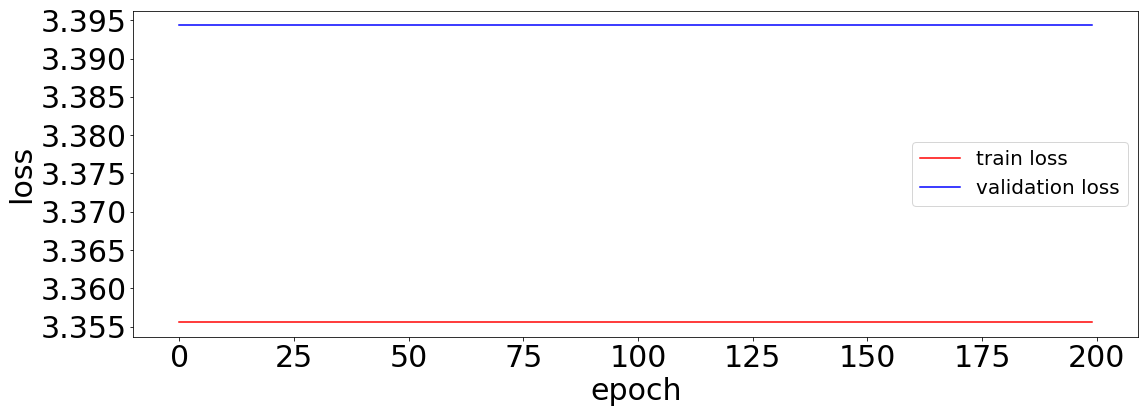

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.plot(losses_train, "-", color="r", label="train loss")
plt.plot(losses_val, "-", color="b", label="validation loss")
plt.xlabel("epoch", fontsize=30)
plt.ylabel("loss", fontsize=30)
plt.legend(fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

(array([3.2 , 3.25, 3.3 , 3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 ]),
 <a list of 9 Text yticklabel objects>)

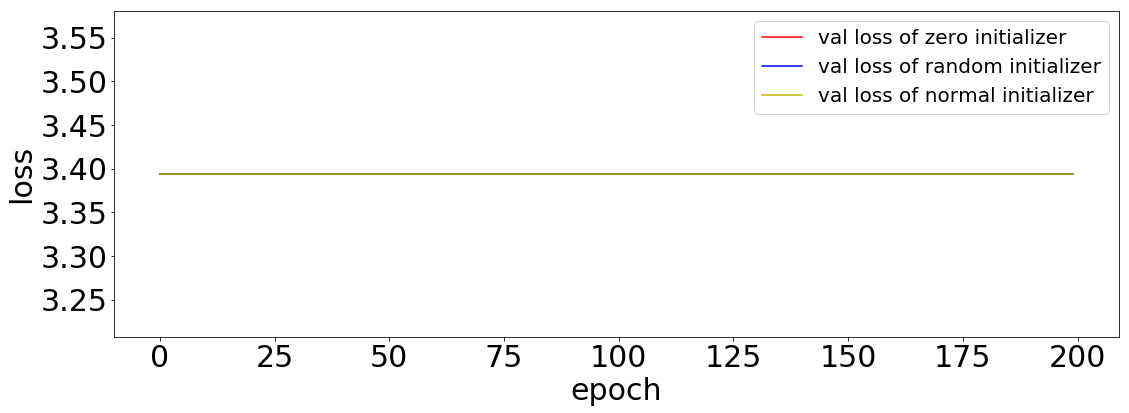

In [20]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.plot(loss_zeros, "-", color="r", label="val loss of zero initializer")
plt.plot(loss_random, "-", color="b", label="val loss of random initializer")
plt.plot(loss_normal, "-", color="y", label="val loss of normal initializer")
plt.xlabel("epoch", fontsize=30)
plt.ylabel("loss", fontsize=30)
plt.legend(fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

(array([3.2 , 3.25, 3.3 , 3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 ]),
 <a list of 9 Text yticklabel objects>)

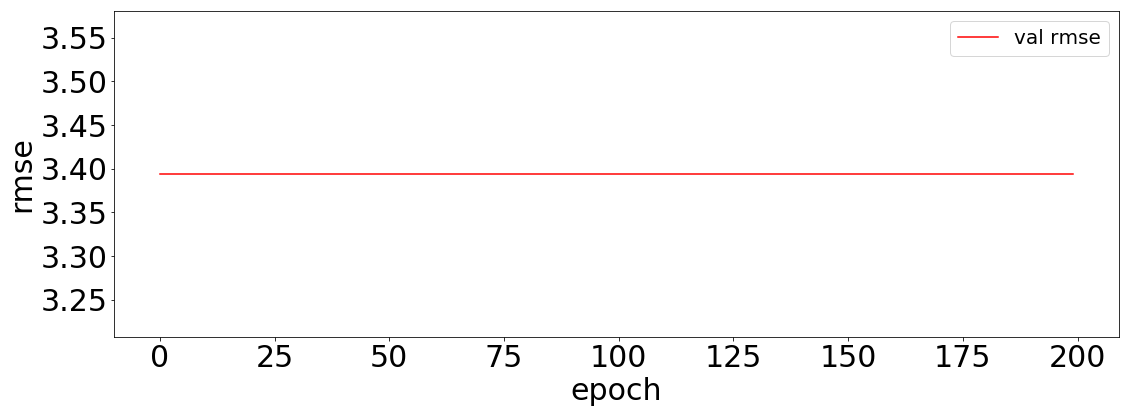

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.plot(rmse_val, "-", color="r", label="val rmse")
plt.xlabel("epoch", fontsize=30)
plt.ylabel("rmse", fontsize=30)
plt.legend(fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

In [21]:
print(numpy.mean(loss_zeros))
print(numpy.mean(loss_random))
print(numpy.mean(loss_normal))

3.3943167644494077
3.3943167644494077
3.3943167644494077


In [14]:
print(losses_train)

[3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153, 3.3556108414052153,

In [15]:
print(losses_val)

[3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086, 3.3943167644494086,